# Modules

In [1]:
import os
import time

from datetime import datetime as dt

import numpy as np
import pandas as pd

from ipywidgets import interact

import larch

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

os.chdir('..')
os.chdir('./catxas')
import catxas

#Timer to see how long it runs
t1 = time.time()

No conda env active, defaulting to base


# 0. Opening and Saving pickled experiment
## 0a. Pickling an experiment (Save)

In [2]:
# output_dir = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Adam Projects\Molleigh Preefer - Battery Cycling\Experiment 1\Results'
# pickle_name = 'MBP25D_all.pickle'

# pickle_path = os.path.join(output_dir,pickle_name)

# pickle_out = open(pickle_path,"wb")
# pickle.dump(my_exp, pickle_out)
# pickle_out.close()

## 0b. unpickling an experiment (open)

In [3]:
# output_dir = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Adam Projects\Molleigh Preefer - Battery Cycling\Experiment 1\Results'
# pickle_name = 'MBP25D_all.pickle'

# pickle_path = os.path.join(output_dir,pickle_name)

# pickle_in = open(pickle_path,"rb")
# my_exp = pickle.load(pickle_in)
# pickle_in.close()

# 1. Define Directory to Spectra and Process Params

In [4]:
# Folder containing only split QEXAFS Spectra
data_dir = r'C:\Users\ashoff\Desktop\QXAS_2022_04_5302_Chalmers\20220403_GaAl2O3_RXN8_0p25Hz_UP'

#Paths to individual process parameter files
MS_filename = ''

LV_filename = r'C:\Users\ashoff\Desktop\QXAS_2022_04_5302_Chalmers\202204_rxn8_QXAS.txt'

# 2. Define QEXAFS BL Data Structure

In [5]:
### Define the layout of the xas data file and how spectra are calcualted
QEXAFS_data_structure = {
    'time stamp': True,
    'time on line': 6,
    'time format': '# First Scan Create Date:\t%m/%d/%Y %I:%M:%S %p ',
    'padded scan numbers': True,
    'column names': ['Encoder', 'Energy', 'ADC_01', 'ADC_02', 'ADC_03', 'ADC_04', 'ADC_05', 'Time', 'Gate'],
    'energy column' : 'Energy', # Energy [eV]
    'sample numerator': 'ADC_01', # I0
    'sample denominator': 'ADC_02', # I1
    'sample ln': True,
    'sample invert': False,
    'reference numerator': 'ADC_01', # I0
    'reference denominator': 'ADC_03', # I2
    'reference ln': True,
    'reference invert': False,
    'is QEXAFS': True
}

# 3. Create Experiment Class and Import  Data
## 3a. Create Experiment Class

In [6]:
# Create the Experimental Class
my_exp = catxas.Experiment("RXN8")

# View keys created inside it
my_exp.__dict__.keys()

dict_keys(['name', 'process_params', 'spectra', 'analysis', 'summary'])

## 3b. Add BL Data to Experiment Class

In [7]:
# timing Event to determine how low it takes to import the data
time_now = time.time()

# Add raw data into spectra files
my_exp.import_spectra_data(data_dir, QEXAFS_data_structure, print_name = False)

In [8]:
# Determine how long importing data took
elapsed = time.time() - time_now
elapsed_time = elapsed/60
print(f'Time Needed to Import all Spectra: {elapsed_time:.2f} min')

Time Needed to Import all Spectra: 7.17 min


## 3c. View Summary File

In [9]:
my_exp.summary['XAS Spectra Files']

,TOS [s],File Name,Padded Name,Path
Time,,,,
2022-04-03 20:11:25.005100,0.0000,20220403_GaAl2O3_RXN8_0p25Hz_00001,20220403_GaAl2O3_RXN8_0p25Hz_00001,C:\Users\ashoff\Desktop\QXAS_2022_04_5302_Chal...
2022-04-03 20:11:28.938900,3.9338,20220403_GaAl2O3_RXN8_0p25Hz_00003,20220403_GaAl2O3_RXN8_0p25Hz_00003,C:\Users\ashoff\Desktop\QXAS_2022_04_5302_Chal...
2022-04-03 20:11:32.936400,7.9313,20220403_GaAl2O3_RXN8_0p25Hz_00005,20220403_GaAl2O3_RXN8_0p25Hz_00005,C:\Users\ashoff\Desktop\QXAS_2022_04_5302_Chal...
2022-04-03 20:11:36.935500,11.9304,20220403_GaAl2O3_RXN8_0p25Hz_00007,20220403_GaAl2O3_RXN8_0p25Hz_00007,C:\Users\ashoff\Desktop\QXAS_2022_04_5302_Chal...
2022-04-03 20:11:40.937600,15.9325,20220403_GaAl2O3_RXN8_0p25Hz_00009,20220403_GaAl2O3_RXN8_0p25Hz_00009,C:\Users\ashoff\Desktop\QXAS_2022_04_5302_Chal...
...,...,...,...,...
2022-04-03 22:25:52.873500,8067.8684,20220403_GaAl2O3_RXN8_0p25Hz_04148,20220403_GaAl2O3_RXN8_0p25Hz_04148,C:\Users\ashoff\Desktop\QXAS_2022_04_5302_Chal...
2022-04-03 22:25:56.876300,8071.8712,20220403_GaAl2O3_RXN8_0p25Hz_04150,20220403_GaAl2O3_RXN8_0p25Hz_04150,C:\Users\ashoff\Desktop\QXAS_2022_04_5302_Chal...
2022-04-03 22:26:00.871900,8075.8668,20220403_GaAl2O3_RXN8_0p25Hz_04152,20220403_GaAl2O3_RXN8_0p25Hz_04152,C:\Users\ashoff\Desktop\QXAS_2022_04_5302_Chal...


## 3d. Time Diagnostic

### Required Until All Database Extraction Issues are Resolved 

In [10]:
# Extract the numebr of spectra, what time "start" was and what the us time stamp was
spectra_no = []
start_time = []
timestamp = []

for line in my_exp.summary['XAS Spectra Files']['File Name']:
    spectra_no.append(int(line[-4:]))
    start_time.append(my_exp.spectra[line]['Time'])
    timestamp.append(int(my_exp.spectra[line]['BL Data'].Time[0]))
    
# Summarize time findings
data_start_time = min(start_time)
data_end_time = max(start_time)
exp_time_span = data_end_time-data_start_time
print(f'First This Scan Time: {data_start_time}')
print(f'Last This Scan Time: {data_end_time}')
print(f'Elpased Time for Collection: {exp_time_span}')

First This Scan Time: 2022-04-03 20:11:25.005100
Last This Scan Time: 2022-04-03 22:26:08.874500
Elpased Time for Collection: 0 days 02:14:43.869400


Text(0, 0.5, 'First Data Point "Time" (min)')

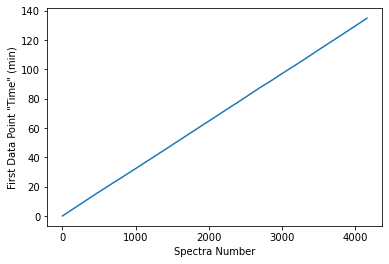

In [11]:
# Plot time components to show linearity between spectra number and timestap
time_scale = 1000000*60 #Seconds to Minutes

plt.plot(spectra_no,[y / time_scale for y in timestamp])
plt.xlabel('Spectra Number')
plt.ylabel('First Data Point "Time" (min)')

## 3e. Development Block to Remove short spectra from QXAS Data

### Should be obsolete once DB Export bugs are fixed

### MANDATORY UNTIL QXAS DB SLICING BUG FIXED

In [12]:
# Check Size (data points) for each spectra and report statistics
df, mean_dpts, stdev_dpts, badPts_df = my_exp.summarize_file_lengths(deviation = 1)

Range of Data Points per Raw Spectrum: 12-40016
Average Number of Data Points per Raw Spectrum: 19715.538121003443
Standard Deviation of Number of Data Points per Raw Spectrum: 1588.5738514602087
Number of spectra with datapoints less than 1 standard deviations from mean: 13
Number of spectra with datapoints greater than 1 standard deviations from mean: 1



Spectra with datapoints less than 1 standard deviations from mean:


                                Filename Data Points
298   20220403_GaAl2O3_RXN8_0p25Hz_00609          21
341   20220403_GaAl2O3_RXN8_0p25Hz_00694          26
380   20220403_GaAl2O3_RXN8_0p25Hz_00776          12
411   20220403_GaAl2O3_RXN8_0p25Hz_00839          14
445   20220403_GaAl2O3_RXN8_0p25Hz_00907          25
509   20220403_GaAl2O3_RXN8_0p25Hz_01040       13830
669   20220403_GaAl2O3_RXN8_0p25Hz_01370          21
1087  20220403_GaAl2O3_RXN8_0p25Hz_02228          19
1492  20220403_GaAl2O3_RXN8_0p25Hz_03061          12
1536  20220403_GaAl2O3_RXN8_0p25Hz_03151

In [13]:
# Visualize the df containing bad spectra
badPts_df

,Filename,Data Points
0,20220403_GaAl2O3_RXN8_0p25Hz_00609,21
1,20220403_GaAl2O3_RXN8_0p25Hz_00694,26
2,20220403_GaAl2O3_RXN8_0p25Hz_00776,12
3,20220403_GaAl2O3_RXN8_0p25Hz_00839,14
4,20220403_GaAl2O3_RXN8_0p25Hz_00907,25
5,20220403_GaAl2O3_RXN8_0p25Hz_01040,13830
6,20220403_GaAl2O3_RXN8_0p25Hz_01370,21
7,20220403_GaAl2O3_RXN8_0p25Hz_02228,19
8,20220403_GaAl2O3_RXN8_0p25Hz_03061,12
9,20220403_GaAl2O3_RXN8_0p25Hz_03151,29


In [14]:
# Remove the bad Spectra
my_exp.remove_bad_spectra(badPts_df.Filename) #looks for list of spectra names

In [15]:
len(my_exp.summary['Spectra Removed'])

14

In [16]:
# Print the names of the spectra removed that are stored in the "Spectra Removed Summary"
if 'Spectra Removed' in my_exp.summary:
    num_spec_removed = len(my_exp.summary['Spectra Removed'])
    print(f'Number of Spectra removed: {num_spec_removed}\n')
    print('Spectra Removed from Experiment:')
    for line in my_exp.summary['Spectra Removed']:
        print(f'\t{line}')

# Confirm spectra in "Spectra Removed" summary are not in the experiment
print('\n')
print('Checking status of removed spectra:')
for line in badPts_df.Filename: 
    if not line in my_exp.spectra:
        print(f'\t{line} Removed from Experiment')
    else:
        print(f'\t{line} STILL IN EXP!!!')

Number of Spectra removed: 14

Spectra Removed from Experiment:
	20220403_GaAl2O3_RXN8_0p25Hz_00609
	20220403_GaAl2O3_RXN8_0p25Hz_00694
	20220403_GaAl2O3_RXN8_0p25Hz_00776
	20220403_GaAl2O3_RXN8_0p25Hz_00839
	20220403_GaAl2O3_RXN8_0p25Hz_00907
	20220403_GaAl2O3_RXN8_0p25Hz_01040
	20220403_GaAl2O3_RXN8_0p25Hz_01370
	20220403_GaAl2O3_RXN8_0p25Hz_02228
	20220403_GaAl2O3_RXN8_0p25Hz_03061
	20220403_GaAl2O3_RXN8_0p25Hz_03151
	20220403_GaAl2O3_RXN8_0p25Hz_03267
	20220403_GaAl2O3_RXN8_0p25Hz_03495
	20220403_GaAl2O3_RXN8_0p25Hz_03553
	20220403_GaAl2O3_RXN8_0p25Hz_01854


Checking status of removed spectra:
	20220403_GaAl2O3_RXN8_0p25Hz_00609 Removed from Experiment
	20220403_GaAl2O3_RXN8_0p25Hz_00694 Removed from Experiment
	20220403_GaAl2O3_RXN8_0p25Hz_00776 Removed from Experiment
	20220403_GaAl2O3_RXN8_0p25Hz_00839 Removed from Experiment
	20220403_GaAl2O3_RXN8_0p25Hz_00907 Removed from Experiment
	20220403_GaAl2O3_RXN8_0p25Hz_01040 Removed from Experiment
	20220403_GaAl2O3_RXN8_0p25Hz_0137

## 3f. Remove unsable data from spectra prior to further processing 

In [17]:
# Organize data to remove duplicate encoder values
my_exp.organize_RawData(remove_duplicates = True, remove_nan_inf = False, remove_zeros = False) 
# remove_nan_inf & remove_zeros does not work yet

Duplicate data points removed
Range of data points per raw spectra: 19131-19913
Range of data points per duplicates removed spectra: 18801-19160


## 3g. Add Process Parameter Data 

In [18]:
# Add Mass Spec Dataset
#my_exp.import_massspec(MS_filename)

# Add LabView Dataset
my_exp.import_labview(LV_filename)

# Display Keys of System
my_exp.process_params.keys()

dict_keys(['LV Data'])

In [19]:
# Check contents of Mass Spec Data
#my_exp.process_params['MS Data']

In [20]:
# Check contents of Mass Spec Data
my_exp.process_params['LV Data']

,Stepnumber,T1 [°C],T2 [°C],T3 [°C],T4 [°C],P1 [psig],P2 [psig],P3 [psig],P4 [psig],P5 [psig],...,Extra TC3 - Extra TC3 [°C],Extra TC4 - Extra TC4 [°C],Extra TC5 - Extra TC5 [°C],Extra TC6 - Extra TC6 [°C],Extra TC7 - Extra TC7 [°C],Extra TC8 - Extra TC8 [°C],Extra DO 1,Extra DO 2,Extra DO 3,Extra DO 4
Time,,,,,,,,,,,,,,,,,,,,,
2022-04-03 19:30:06,0,2303.642999,25.562011,2303.839475,2303.839475,73.819159,73.559984,82.991151,33.452344,19.939562,...,2303.642999,2303.839475,2303.839475,2303.839475,2303.714805,2303.714805,0,0,0,0
2022-04-03 19:30:10,0,2303.646937,25.590771,2303.842842,2303.842842,73.822042,73.572537,82.993166,33.452195,19.940743,...,2303.646937,2303.842842,2303.842842,2303.842842,2303.718770,2303.718770,0,0,0,0
2022-04-03 19:30:11,0,2303.646937,25.590771,2303.842842,2303.842842,73.833448,73.565873,82.990903,33.452465,19.942026,...,2303.646937,2303.842842,2303.842842,2303.842842,2303.718770,2303.718770,0,0,0,0
2022-04-03 19:30:12,0,2303.646937,25.590771,2303.842842,2303.842842,73.856724,73.558744,82.999954,33.452065,19.940789,...,2303.646937,2303.842842,2303.842842,2303.842842,2303.718770,2303.718770,0,0,0,0
2022-04-03 19:30:13,0,2303.643980,25.601473,2303.839640,2303.839640,73.856724,73.558744,82.999954,33.452065,19.940789,...,2303.643980,2303.839640,2303.839640,2303.839640,2303.715051,2303.715051,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-03 22:26:21,0,2305.182350,25.316644,2305.384117,2305.384117,73.880962,73.678600,83.555528,33.452474,19.794480,...,2305.182350,2305.384117,2305.384117,2305.384117,2305.270136,2305.270136,0,0,0,0
2022-04-03 22:26:22,0,2305.197566,25.318448,2305.399388,2305.399388,73.880962,73.678600,83.555528,33.452474,19.794480,...,2305.197566,2305.399388,2305.399388,2305.399388,2305.285924,2305.285924,0,0,0,0
2022-04-03 22:26:23,0,2305.197566,25.318448,2305.399388,2305.399388,73.895994,73.676647,83.549794,33.452400,19.794722,...,2305.197566,2305.399388,2305.399388,2305.399388,2305.285924,2305.285924,0,0,0,0


# 4. Correlate Process Paramters to X-ray Spectra Timestamps

## 4a. Correlate Parameters

In [21]:
# Correlate Process Params
my_exp.correlate_process_params()

# View Correlation Table
my_exp.summary['XAS Spectra Process Params']

,File Name,TOS [s],Stepnumber,T1 [°C],T2 [°C],T3 [°C],T4 [°C],P1 [psig],P2 [psig],P3 [psig],...,Extra TC3 - Extra TC3 [°C],Extra TC4 - Extra TC4 [°C],Extra TC5 - Extra TC5 [°C],Extra TC6 - Extra TC6 [°C],Extra TC7 - Extra TC7 [°C],Extra TC8 - Extra TC8 [°C],Extra DO 1,Extra DO 2,Extra DO 3,Extra DO 4
Time,,,,,,,,,,,,,,,,,,,,,
2022-04-03 20:11:25.005100,20220403_GaAl2O3_RXN8_0p25Hz_00001,0.0000,0.0,2303.820373,25.541835,2304.010295,2304.010295,73.908392,73.625382,83.113207,...,2303.820373,2304.010295,2304.010295,2304.010295,2303.888790,2303.888790,0.0,0.0,0.0,0.0
2022-04-03 20:11:28.938900,20220403_GaAl2O3_RXN8_0p25Hz_00003,3.9338,0.0,2303.836816,25.605362,2304.026114,2304.026114,73.899682,73.627788,83.114604,...,2303.836816,2304.026114,2304.026114,2304.026114,2303.904771,2303.904771,0.0,0.0,0.0,0.0
2022-04-03 20:11:32.936400,20220403_GaAl2O3_RXN8_0p25Hz_00005,7.9313,0.0,2303.827512,25.589367,2304.017216,2304.017216,73.880032,73.614441,83.119716,...,2303.827512,2304.017216,2304.017216,2304.017216,2303.896307,2303.896307,0.0,0.0,0.0,0.0
2022-04-03 20:11:36.935500,20220403_GaAl2O3_RXN8_0p25Hz_00007,11.9304,0.0,2303.826880,25.588281,2304.016612,2304.016612,73.880142,73.609410,83.114779,...,2303.826880,2304.016612,2304.016612,2304.016612,2303.895732,2303.895732,0.0,0.0,0.0,0.0
2022-04-03 20:11:40.937600,20220403_GaAl2O3_RXN8_0p25Hz_00009,15.9325,0.0,2303.822231,25.618632,2304.011773,2304.011773,73.895313,73.617485,83.117319,...,2303.822231,2304.011773,2304.011773,2304.011773,2303.890811,2303.890811,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-03 22:25:52.873500,20220403_GaAl2O3_RXN8_0p25Hz_04148,8067.8684,0.0,2305.201070,25.328314,2305.401886,2305.401886,73.867609,73.671815,83.549146,...,2305.201070,2305.401886,2305.401886,2305.401886,2305.289429,2305.289429,0.0,0.0,0.0,0.0
2022-04-03 22:25:56.876300,20220403_GaAl2O3_RXN8_0p25Hz_04150,8071.8712,0.0,2305.199520,25.291552,2305.401218,2305.401218,73.874713,73.670941,83.553218,...,2305.199520,2305.401218,2305.401218,2305.401218,2305.288117,2305.288117,0.0,0.0,0.0,0.0
2022-04-03 22:26:00.871900,20220403_GaAl2O3_RXN8_0p25Hz_04152,8075.8668,0.0,2305.199301,25.286363,2305.401124,2305.401124,73.877345,73.670185,83.549783,...,2305.199301,2305.401124,2305.401124,2305.401124,2305.287932,2305.287932,0.0,0.0,0.0,0.0


## 4b. Save Correlation Table

In [22]:
# Save Process paramters:

# Define path to save Correlated Process Parameters:
output_dir = r'C:\Users\ashoff\Desktop\QXAS_2022_04_5302_Chalmers'

# Save the Values
my_exp.save_processparams(output_dir)

Process Parameter Data Saved


# 5. Calcualte Absorption Spectra [Sample and/or Reference]

In [23]:
# Calculates the absoprtion spectra of the sample and the reference 
my_exp.calculate_spectra(sample_spectra = True, ref_spectra = True)

# Test Scan names:

scan_name1 = '20220403_GaAl2O3_RXN8_0p25Hz_00001'

In [24]:
# Check that absorption spectra were calculated
my_exp.spectra[scan_name1]['Absorption Spectra']['mu Sample']

Attribute,Type
energy,ndarray
mu,ndarray
name,str


In [25]:
# Check that absorption spectra were calculated
my_exp.spectra[scan_name1]['Absorption Spectra']['mu Reference']

Attribute,Type
energy,ndarray
mu,ndarray
name,str


(10300.0, 10600.0)

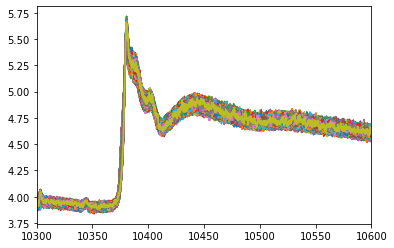

In [26]:
# Quick Visualization of Raw Data
xmin = 10300
xmax = 10600

for key in my_exp.spectra.keys():
    x = my_exp.spectra[key]['Absorption Spectra']['mu Sample'].energy
    y = my_exp.spectra[key]['Absorption Spectra']['mu Sample'].mu
    plt.plot(x,y)
    
plt.xlim([xmin, xmax])

# 6. Calibrate Spectra and Calculate Sample E0
## 6a. Calibrate Reference Spectra

In [27]:
# Reference Calibration Energy
# Note: poor quality reference data can throw off analysis. best to omit step and use encoder as is. 

#### add functional to calibrate each spectra separately
#Ref_E0 = 8979
#my_exp.calibrate_reference_spectra(Ref_E0, use_mean = True, energy_range = 20)

## 6b. Calculate Sample E0

Sample Calibraiton Statistics:
Sample E0 min: 10374.77 eV
Sample E0 max: 10384.91 eV
Sample E0 mean: 10379.27 +/- 0.62 eV
Sample E0 set to: 10379.27 eV




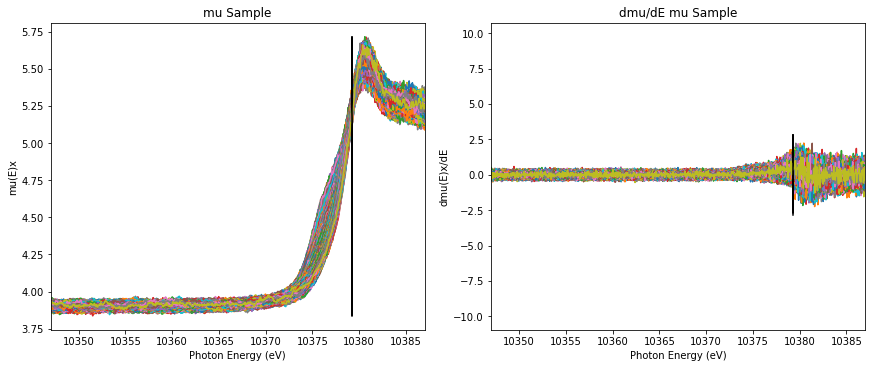

In [28]:
#Approximate edge of the Sample and determine approxiamte edge position
Samp_E0 = 10367
my_exp.find_sample_e0(Samp_E0)

# 7. Normalize Spectra
## 7a. Define normalization paramaters (can be separate for reference channel)

In [29]:
# Check starting and ending energy ranges for normalization purposes
df = my_exp.check_Energy_Range()
# Visualize parameters for each spectra
df

Variation in starting energy points between spectra [eV]: 10188.946-10191.405
Variation in ending energy points between spectra [eV]: 11009.609-11010.483
Variation in step size of energy points between spectra [eV]: 0.043-0.044


,E_min,E_max,Min_E_Step,Max_E_Step,Mean_E_Step,STD_E_Step
0,10191.405167,11009.931807,0.006089,0.073767,0.043539,0.018788
1,10189.311022,11009.802877,0.006086,0.073781,0.042893,0.019269
2,10189.359713,11009.981947,0.006086,0.079085,0.042926,0.019348
3,10189.371885,11009.946132,0.006086,0.074380,0.042949,0.019274
4,10189.262332,11010.053576,0.006086,0.073779,0.042924,0.019215
...,...,...,...,...,...,...
2014,10189.195383,11010.096554,0.006086,0.073787,0.042889,0.019287
2015,10189.177125,11010.139532,0.006086,0.073781,0.042944,0.019335
2016,10189.298849,11010.067902,0.006086,0.073778,0.042918,0.019296
2017,10189.237987,11010.003435,0.006086,0.073888,0.042871,0.019244


In [30]:
#Normalization paramters, references to E0
pre1 = -150
pre2 = -50
norm1 = 75
norm2 = 700
nnorm = 2
make_flat = True

## 7b. Store normalization parameters into each spectrum

In [31]:
#my_exp.set_normalization_parameters('mu Reference', pre1 = pre1, pre2 = pre2, 
#                                    norm1 = norm1, norm2 = norm2, nnorm = nnorm, 
#                                    make_flat = make_flat)

my_exp.set_normalization_parameters('mu Sample', pre1 = pre1, pre2 = pre2, 
                                    norm1 = norm1, norm2 = norm2, nnorm = nnorm, 
                                    make_flat = make_flat)



## 7c. Normalize and visualize spectra

In [32]:
# Normalize Specta

#my_exp.normalize_spectra('mu Reference')
my_exp.normalize_spectra('mu Sample')

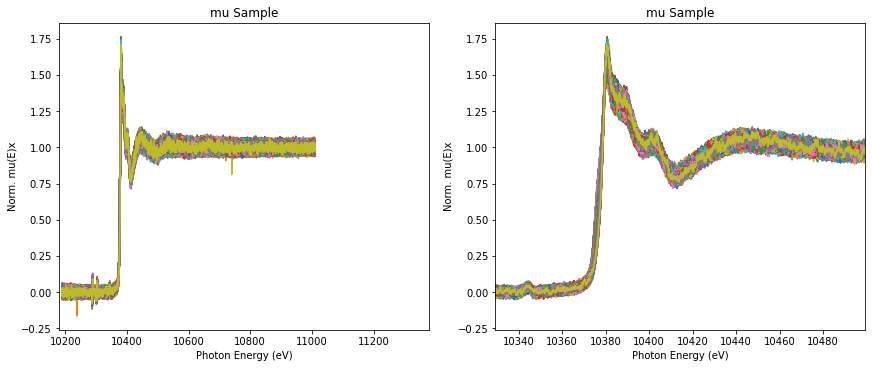

In [33]:
# Visualization of Normalized Spectra

#my_exp.plot_norm_spectra(spectra = 'mu Reference')
my_exp.plot_norm_spectra(spectra = 'mu Sample')

# 8. Interpolation of XANES Spectra
## 8a. Determining how to interpolate XAS Structure

In [34]:
# Diagnostic to show range of usable enrgy given all spectra files in experiment
df = my_exp.check_Energy_Range()

Variation in starting energy points between spectra [eV]: 10188.946-10191.405
Variation in ending energy points between spectra [eV]: 11009.609-11010.483
Variation in step size of energy points between spectra [eV]: 0.043-0.044


In [35]:
# Visualize parameters for each spectra
df

,E_min,E_max,Min_E_Step,Max_E_Step,Mean_E_Step,STD_E_Step
0,10191.405167,11009.931807,0.006089,0.073767,0.043539,0.018788
1,10189.311022,11009.802877,0.006086,0.073781,0.042893,0.019269
2,10189.359713,11009.981947,0.006086,0.079085,0.042926,0.019348
3,10189.371885,11009.946132,0.006086,0.074380,0.042949,0.019274
4,10189.262332,11010.053576,0.006086,0.073779,0.042924,0.019215
...,...,...,...,...,...,...
2014,10189.195383,11010.096554,0.006086,0.073787,0.042889,0.019287
2015,10189.177125,11010.139532,0.006086,0.073781,0.042944,0.019335
2016,10189.298849,11010.067902,0.006086,0.073778,0.042918,0.019296
2017,10189.237987,11010.003435,0.006086,0.073888,0.042871,0.019244


## 8b. Interpolate XANES Spectra onto defined grid

### Interpolation step needed to expot data to CSV for use in PCA/MCR-ALS software
### Still need to work out legend step for timing signal

In [36]:
# Set the energy range and step size to interpolate onto
start = 10325
stop = 10500
step = 0.2

# Interpolate Spectra
result = my_exp.interpolate_spectra(start, stop, step, x_axis = 'energy', sample = 'mu Sample')

<AxesSubplot:xlabel='energy'>

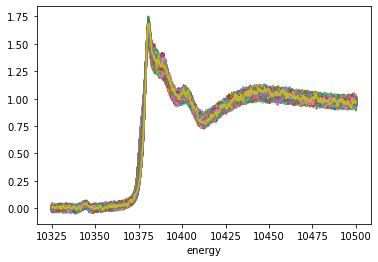

In [37]:
# Visualzie Interpolated Spectra
result.plot(legend=False)

In [38]:
# Inspect DataFrame containing interpoalted spectra
result

,2022-04-03 20:11:25.005100,2022-04-03 20:11:28.938900,2022-04-03 20:11:32.936400,2022-04-03 20:11:36.935500,2022-04-03 20:11:40.937600,2022-04-03 20:11:44.937200,2022-04-03 20:11:48.936200,2022-04-03 20:11:52.935500,2022-04-03 20:11:56.938900,2022-04-03 20:12:00.934700,...,2022-04-03 22:25:32.872100,2022-04-03 22:25:36.871200,2022-04-03 22:25:40.873900,2022-04-03 22:25:44.872900,2022-04-03 22:25:48.871300,2022-04-03 22:25:52.873500,2022-04-03 22:25:56.876300,2022-04-03 22:26:00.871900,2022-04-03 22:26:04.876200,2022-04-03 22:26:08.874500
energy,,,,,,,,,,,,,,,,,,,,,
10325.0,0.004179,-0.006366,0.009777,0.019901,0.018393,-0.003601,0.002956,0.001561,0.004247,0.000578,...,0.017448,0.000534,-0.010115,0.015269,0.000829,0.002419,-0.007027,0.014588,0.026619,0.005735
10325.2,-0.001965,-0.017291,0.010101,0.011594,0.020973,-0.002975,0.002671,0.007819,0.002094,0.001120,...,0.023312,0.006480,0.003138,0.013962,0.005366,0.005571,0.002292,0.009687,0.016060,0.008710
10325.4,0.007348,-0.009501,0.010488,0.010880,0.010301,0.003871,0.001648,-0.000739,0.018649,-0.001803,...,0.013316,0.004358,-0.009832,0.003539,-0.000049,-0.001076,0.012722,-0.001009,0.012945,0.016050
10325.6,0.007964,-0.005713,0.011162,-0.005169,0.010735,0.003348,0.004401,-0.007315,0.004255,0.001570,...,0.003412,0.003314,-0.004871,-0.002552,-0.007867,-0.010440,0.004588,0.013446,-0.004948,0.004135
10325.8,0.004628,-0.002492,0.004037,0.008024,0.004186,0.005883,0.008314,0.000351,-0.000886,0.008823,...,-0.000125,-0.002895,-0.005718,0.012503,0.004950,-0.002252,-0.011491,0.006981,-0.000909,0.002909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10499.4,0.950479,0.964538,0.937510,1.006764,0.981745,0.968964,0.969189,0.977428,0.983289,0.958280,...,0.914918,0.957687,0.968844,0.941660,0.961368,0.978393,0.944971,0.965262,0.969393,0.969508
10499.6,0.929523,0.965431,0.948545,0.988342,0.993757,0.997797,0.973408,0.976439,0.970171,0.952589,...,0.917943,0.960209,0.964883,0.958502,0.955465,0.981403,0.953773,0.972798,0.975137,0.981179
10499.8,0.948822,0.952997,0.960897,0.995713,0.997835,0.954513,0.957378,0.973660,0.957691,0.959922,...,0.914390,0.972345,0.972175,0.962324,0.973881,0.970398,0.947958,0.967755,0.957598,0.955515


## 8c. Save the dataframe to a csv file 

In [39]:
# Define path and filename to save Normalized XANES:
output_dir = r'C:\Users\ashoff\Desktop\QXAS_2022_04_5302_Chalmers'
result_name = 'NormXANES_RXN8'

# Save Normalized XANES:
result.to_csv(os.path.join(output_dir,result_name + '.csv'), sep=',', header=True, index=True)

# 9. Linear Combination Fitting
## 9a. LCF using Sample Spectra (First/{Intermediate}/Last Spectra)

In [40]:
# Basis set made from three spectra in the sample dataset
scan_name1 = '20220403_GaAl2O3_RXN8_0p25Hz_00001'
scan_name2 = '20220403_GaAl2O3_RXN8_0p25Hz_02153'
scan_name3 = '20220403_GaAl2O3_RXN8_0p25Hz_04156'

basis1 = my_exp.spectra[scan_name1]['Absorption Spectra']['mu Sample'] 
basis1.name = scan_name1

basis2 = my_exp.spectra[scan_name2]['Absorption Spectra']['mu Sample']
basis2.name = scan_name2

basis3 = my_exp.spectra[scan_name3]['Absorption Spectra']['mu Sample']
basis3.name = scan_name3

#basis = [basis1, basis3]
basis = [basis1, basis2, basis3]

In [41]:
# Load list of basis spectra into the experiment
my_exp.load_lcf_basis(basis, 'Fit 1')

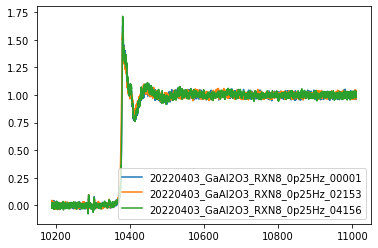

In [42]:
# Visualize basis sets to confirm normalized
for line in my_exp.analysis['LCF']['Fit 1']['basis spectra']:
    x = line.energy
    y = line.flat
    label = line.name
    plt.plot(x,y, label = label)
    
plt.legend()

In [43]:
# Fit the sample spectra
emin = 10300
emax = 10500

my_exp.fit_LCF('Fit 1', emin, emax, weights=None, minvals=0, maxvals=1, arrayname='flat', sum_to_one=True)

In [44]:
# Generate fit report for all spectra
my_exp.lcf_report('Fit 1')
my_exp.analysis['LCF']['Fit 1']['Fit Summary']

,Name,Chi2,RedChi2,Variables,Amp1,Amp1-stdev,Amp2,Amp2-stdev,Amp3,Amp3-stdev,Sum Amp
0,20220403_GaAl2O3_RXN8_0p25Hz_00001,2.065573e-29,5.629798e-33,2,1.000000,1.620676e-17,0.000000,8.942463e-27,4.440892e-16,1.620676e-17,1.0
1,20220403_GaAl2O3_RXN8_0p25Hz_00003,1.408545e+00,3.856915e-04,2,0.568052,1.294833e-02,0.070617,5.885331e-03,3.613308e-01,1.345497e-02,1.0
2,20220403_GaAl2O3_RXN8_0p25Hz_00005,1.401265e+00,3.836979e-04,2,0.533850,1.293055e-02,0.013632,5.921364e-03,4.525189e-01,1.343835e-02,1.0
3,20220403_GaAl2O3_RXN8_0p25Hz_00007,1.539739e+00,4.203492e-04,2,0.530254,1.348424e-02,0.009113,6.162695e-03,4.606326e-01,1.401779e-02,1.0
4,20220403_GaAl2O3_RXN8_0p25Hz_00009,1.890715e+00,5.171539e-04,2,0.600691,1.497223e-02,0.013573,6.797250e-03,3.857368e-01,1.556331e-02,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2014,20220403_GaAl2O3_RXN8_0p25Hz_04148,1.760932e+00,4.820511e-04,2,0.456391,1.448225e-02,0.067084,6.569778e-03,4.765258e-01,1.506061e-02,1.0
2015,20220403_GaAl2O3_RXN8_0p25Hz_04150,1.541991e+00,4.223476e-04,2,0.466550,1.354530e-02,0.074991,6.198267e-03,4.584593e-01,1.407825e-02,1.0
2016,20220403_GaAl2O3_RXN8_0p25Hz_04152,1.742423e+00,4.758118e-04,2,0.437354,1.434294e-02,0.074191,6.537972e-03,4.884551e-01,1.489482e-02,1.0
2017,20220403_GaAl2O3_RXN8_0p25Hz_04154,1.609663e+00,4.401595e-04,2,0.497596,1.383507e-02,0.086355,6.275946e-03,4.160484e-01,1.438126e-02,1.0


In [45]:
# Save Fit Report
LCFReport_name = 'First_Last_LCFReport'

my_exp.analysis['LCF']['Fit 1']['Fit Summary'].to_csv(os.path.join(output_dir,LCFReport_name + '.csv'), sep=',', header=True, index=False)

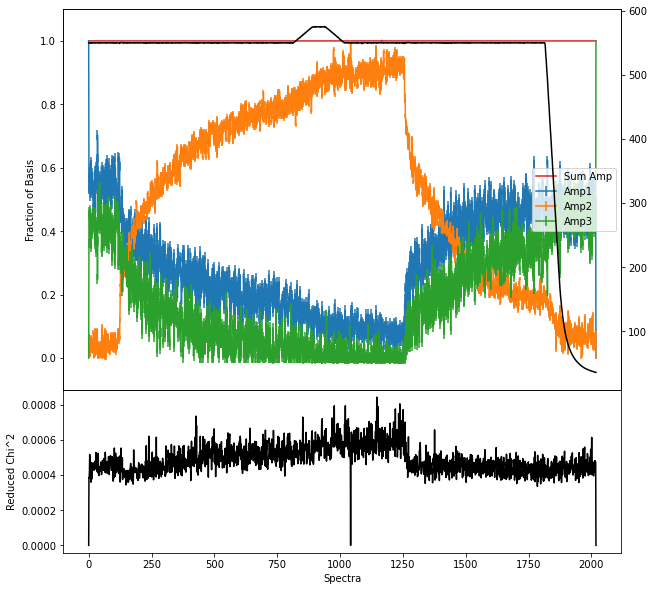

In [46]:
# Visualize Fit with Process Paramters
my_exp.plot_LCF_results('Fit 1', process_parameter = 'TR1 T [°C]')

In [47]:
# use interact decorator to decorate the function, so the function can receive the slide bar's value with parameter x.

# Still in Development
spectra_names = list(my_exp.spectra.keys())

@interact(x=(1, len(spectra_names)))
def plot_LCF(x):
    key = spectra_names[x-1]
    #print(key)
    
    fig1 = plt.figure(constrained_layout=True, figsize = (12,10))
    spec1 = gridspec.GridSpec(ncols = 1, nrows = 1, figure = fig1)

    f1_ax1 = fig1.add_subplot(spec1[0])
    
    x = my_exp.analysis['LCF']['Fit 1']['Results'][key].xdata
    y1 = my_exp.analysis['LCF']['Fit 1']['Results'][key].ydata
    y2 = my_exp.analysis['LCF']['Fit 1']['Results'][key].yfit
    y4 = y1-y2

    f1_ax1.plot(x, y1, color = 'k', label = 'Data')
    f1_ax1.plot(x, y2, color = 'r', label = 'Fit')
    f1_ax1.plot(x, y4, color = 'b', label = 'Resid')
    

    for key2 in my_exp.analysis['LCF']['Fit 1']['Results'][key].ycomps.keys():
        y3 = my_exp.analysis['LCF']['Fit 1']['Results'][key].ycomps[key2]
        f1_ax1.plot(x,y3, label = key2)
    
    plt.xlim(10300,10500)
    plt.ylim(-0.05, 1.6)
    plt.title(key)
    plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

interactive(children=(IntSlider(value=1010, description='x', max=2019, min=1), Output()), _dom_classes=('widge…

In [48]:
# Last timing check to see how long you have ben working on this
elapsed = time.time() - t1
elapsed_min = elapsed/60
print(f'Elapsed time: {elapsed_min:.2f} min')

Elapsed time: 12.86 min
